In [2]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [4]:
wine= pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.describe(percentiles=[0.25,0.5,0.75,0.80,1])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
80%,9.700000,0.660000,0.460000,2.700000,0.094000,24.000000,69.000000,0.998174,3.424000,0.760000,11.300000,6.000000
100%,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine.shape

(1599, 12)

In [22]:
wine.columns[0]

'fixed acidity'

In [28]:
#how every attriute affecting the target variable - quality.
def func(attr):
    output=wine[[attr,'quality']].groupby(['quality'],as_index=False).mean().sort_values(by='quality')
    return output


In [31]:
for i in range(11):
    att=wine.columns[i]
    o=func(att)
    print(o)


   quality  fixed acidity
0        3       8.360000
1        4       7.779245
2        5       8.167254
3        6       8.347179
4        7       8.872362
5        8       8.566667
   quality  volatile acidity
0        3          0.884500
1        4          0.693962
2        5          0.577041
3        6          0.497484
4        7          0.403920
5        8          0.423333
   quality  citric acid
0        3     0.171000
1        4     0.174151
2        5     0.243686
3        6     0.273824
4        7     0.375176
5        8     0.391111
   quality  residual sugar
0        3        2.635000
1        4        2.694340
2        5        2.528855
3        6        2.477194
4        7        2.720603
5        8        2.577778
   quality  chlorides
0        3   0.122500
1        4   0.090679
2        5   0.092736
3        6   0.084956
4        7   0.076588
5        8   0.068444
   quality  free sulfur dioxide
0        3            11.000000
1        4            12.264151
2       

In [32]:
wine.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [33]:
wine.columns.isnull().any()

False

In [35]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

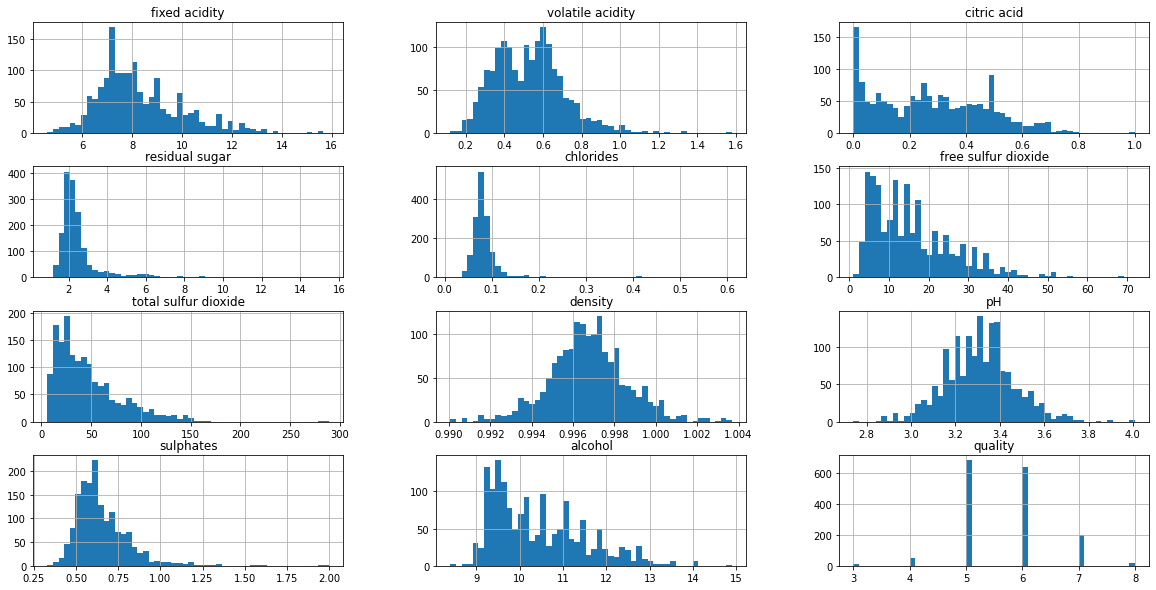

In [38]:
wine.hist(bins=50,figsize=(20,10))

<BarContainer object of 1599 artists>

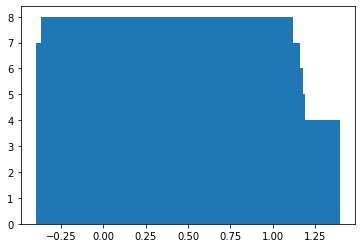

In [42]:
plt.bar(wine['citric acid'],wine['quality'])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
bins = (2, 6.5, 8)
labels = [0, 1]
wine['quality'] = pd.cut(x = wine['quality'], bins = bins, labels = labels)

In [49]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [51]:
y=wine.quality
x=wine.drop(['quality'],axis=1)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 206)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 

Score :  0.928125
GradientBoostingClassifier Acc :  0.928125


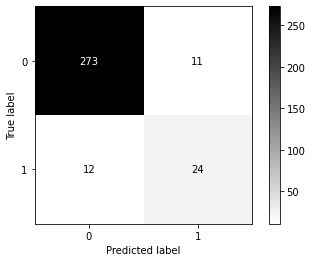

In [58]:
from sklearn.metrics import plot_confusion_matrix
gbc = GradientBoostingClassifier(max_depth= 7, random_state=2)
gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)
cm_aaa = confusion_matrix(y_test, y_pred_gbc)
acc = accuracy_score(y_test, y_pred_gbc)
score = gbc.score(x_test, y_test)
#results.append(acc)

print("Score : ", score)
print("GradientBoostingClassifier Acc : ", acc)

plot_confusion_matrix(gbc, x_test, y_test, cmap= "binary")  
plt.show()

In [59]:
print(" \t \t  GradientBoostingClassifier Classification Report")
print(classification_report(y_test, y_pred_gbc))

 	 	  GradientBoostingClassifier Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       284
           1       0.69      0.67      0.68        36

    accuracy                           0.93       320
   macro avg       0.82      0.81      0.82       320
weighted avg       0.93      0.93      0.93       320



Score :  0.925
RandomForestClassifier Acc :  0.925


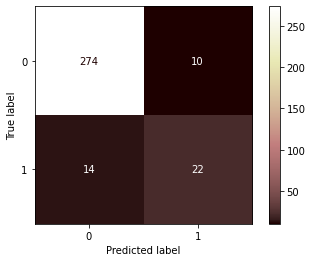

In [61]:
rf = RandomForestClassifier(max_depth=18, random_state=44, bootstrap = True)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)

acc = accuracy_score(y_test, y_pred_rf)
score = rf.score(x_test, y_test)
#results.append(acc)

print("Score : ", score)
print("RandomForestClassifier Acc : ", acc)

plot_confusion_matrix(rf, x_test, y_test, cmap= "pink")  
plt.show()

In [62]:
print(" \t \t  RandomForestClassifier Classification Report")
print(classification_report(y_test, y_pred_rf))

 	 	  RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       284
           1       0.69      0.61      0.65        36

    accuracy                           0.93       320
   macro avg       0.82      0.79      0.80       320
weighted avg       0.92      0.93      0.92       320

